<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/Portafolio_Fiduciaria_Bogota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# **Portafolio Diario**

In [96]:
pd.options.display.float_format = '{:,.0f}'.format

In [ ]:
from google.colab import files

files.upload()

In [92]:
FIB = pd.read_excel("/content/FIB Formato portafolio diario para envío 6...xlsx")

In [8]:
Ultimo_Portafolio = FIB.loc[FIB['Fecha'] > "2023-02-11"]

In [101]:
Composicion = pd.pivot_table(Ultimo_Portafolio, values='Valor Presente', index='Fecha', columns='Tasa Indexada', aggfunc=np.sum, margins=True, margins_name='Total') \
    .rename(columns={'NO': 'FIC', 'No Tiene': 'AHORROS'}) \
    .drop(index=['Total'])
Composicion.tail()

Tasa Indexada,FS,IB1,IPC,FIC,AHORROS,Total
Fecha,,,,,,
2023-09-16 00:00:00,"151,576,145,000","10,894,365,000","12,563,330,000","3,739,321,698","1,300,691,609","180,073,853,306"
2023-09-17 00:00:00,"151,527,810,000","10,839,735,000","12,568,705,000","3,739,321,698","1,301,127,949","179,976,699,646"
2023-09-18 00:00:00,"151,609,210,000","10,863,005,000","12,565,290,000","4,022,989,058","1,301,563,655","180,362,057,713"
2023-09-19 00:00:00,"151,319,450,000","10,871,655,000","12,569,020,000","4,020,909,639","1,302,056,603","180,083,091,242"
2023-09-20 00:00:00,"151,300,745,000","10,883,165,000","12,570,275,000","4,020,407,065","1,302,491,822","180,077,083,887"


In [100]:
Utilidadindicador = pd.pivot_table(Ultimo_Portafolio, values='Utilidad día', index='Fecha', columns='Tasa Indexada', aggfunc=np.sum, margins=True, margins_name='Total') \
    .rename(columns={'NO': 'FIC', 'No Tiene': 'AHORROS'}) \
    .drop(index=['Total'])
Utilidadindicador.tail()

Tasa Indexada,FS,IB1,IPC,FIC,AHORROS,Total
Fecha,,,,,,
2023-09-16 00:00:00,"44,268,000","4,620,000","5,415,000",0,"436,193","54,739,193"
2023-09-17 00:00:00,"46,793,500","4,660,000","5,375,000",0,"436,340","57,264,840"
2023-09-18 00:00:00,"81,400,000","23,270,000","-3,415,000","2,405,360","436,486","104,096,846"
2023-09-19 00:00:00,"-289,760,000","8,650,000","3,730,000","920,581","436,633","-276,022,786"
2023-09-20 00:00:00,"-18,705,000","11,510,000","1,255,000","-502,574","436,779","-6,005,795"


In [37]:
Composicion=Composicion.drop(columns=['FIC'])

In [34]:
Composicion.fillna(0, inplace=True)

In [35]:
corr_matrix=Composicion.corr()

In [38]:
cov_matrix = returns.cov()
expected_returns = returns.mean()

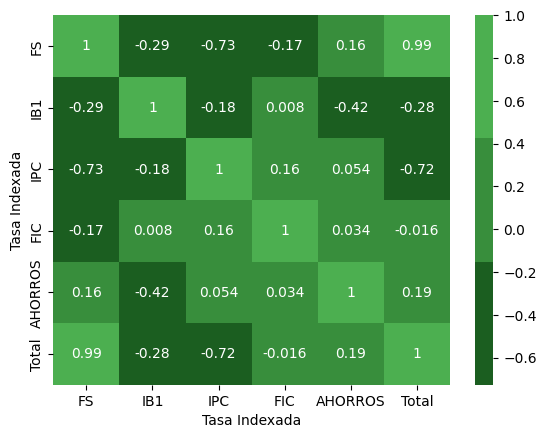

In [36]:
colors = ['#1B5E20', '#388E3C', '#4CAF50']
cmap = ListedColormap(colors)
sns.heatmap(corr_matrix,cmap=cmap, annot=True)
plt.show()

# **Portafolio Historico**

In [29]:
porcentajes.fillna(0, inplace=True)

In [ ]:
# Crear el gráfico de áreas apiladas al 100%
ax = porcentajes.plot(kind='area', stacked=True, figsize=(10, 5), legend=True, ylim=[0, 1], y=['FIC','AHORROS',"FS","IB1","IPC"])

# Configurar el título y etiquetas de los ejes
ax.set_title('Composición del portafolio')
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor Presente')

# Mostrar la leyenda del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()

In [24]:
Ultimo_Portafolio = FIB.loc[FIB['Fecha'] > "2023-04-11"]

In [ ]:
Utilidadindicador

In [27]:
df = Utilidadindicador .data
# Calcular la columna de porcentajes
porcentajes = df.div(df.iloc[:,-1], axis=0).iloc[:,:-1]
porcentajes.columns = [str(col) for col in porcentajes.columns]
# Agregar la columna de porcentajes al DataFrame
df = pd.concat([df, porcentajes], axis=0)
Utilidadindicador  = df.style.format('{:,.2f}'.format)

Utilidadindicador

,FS,IB1,IPC,FIC,AHORROS,Total
Fecha,,,,,,
2023-04-12 00:00:00,"7,745,000.00","-3,450,000.00","35,820,000.00","-1,159,295.15","48,854.25","39,004,559.10"
2023-04-13 00:00:00,"9,650,000.00","2,095,000.00","13,840,000.00","6,142,005.88","48,854.25","31,775,860.13"
2023-04-14 00:00:00,"-11,555,000.00","4,065,000.00","3,990,000.00","4,007,683.12","48,854.25","556,537.37"
2023-04-15 00:00:00,"3,380,000.00","3,570,000.00","6,350,000.00",0.00,"210,513.65","13,510,513.65"
2023-04-16 00:00:00,"3,390,000.00","3,575,000.00","6,380,000.00",0.00,"210,583.26","13,555,583.26"
2023-04-17 00:00:00,"-775,000.00","14,455,000.00","235,000.00","6,171,105.11","210,652.90","20,296,758.01"
2023-04-18 00:00:00,"4,960,947.20","-4,165,000.00","1,830,000.00","832,223.08","210,720.07","3,668,890.35"
2023-04-19 00:00:00,"15,578,766.00","-5,283,333.33","-430,000.00","4,139,120.35","210,720.07","14,215,273.09"
2023-04-20 00:00:00,"10,990,708.36","-7,080,000.00","-1,305,000.00","496,412.47","210,855.12","3,312,975.95"
